# Modul 6c: Elektrische Felder – Ausführliche Lösungen

## 📌 Hinweise zu den Lösungen

Diese Datei enthält **vollständige Lösungen** zu allen Aufgaben aus **M06b**. Jeder Schritt ist kommentiert und erklärt. Es gibt oft **mehrere Wege**, die gleichen Ergebnisse zu erreichen – wir zeigen hier bewährte Varianten.

---

## 🔍 Lösung zu Aufgabe 1: Das Coulomb-Gesetz interaktiv erkunden

### Vollständige Lösung

Ladung 1: 1.00e-05 C
Ladung 2: 2.00e-05 C


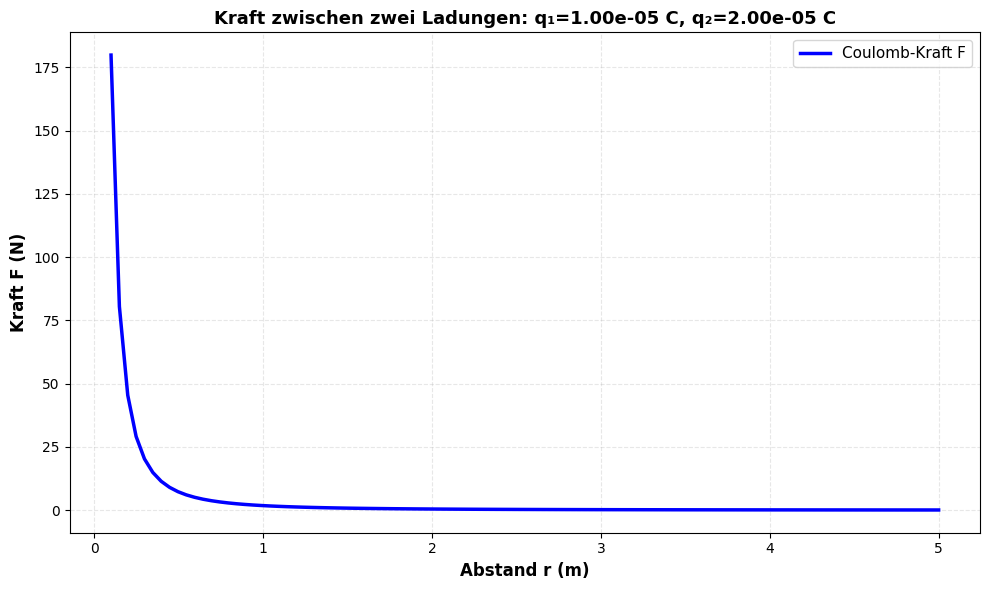


--- Analyse der Kraft bei verschiedenen Abständen ---
Bei r = 0.5 m: F = 7.192000e+00 N
Bei r = 1.0 m: F = 1.798000e+00 N
Bei r = 2.0 m: F = 4.495000e-01 N
Bei r = 3.0 m: F = 1.997778e-01 N

--- Überprüfung des 1/r²-Gesetzes ---
Verhältnis F(1m) / F(2m) = 4.0 (sollte ca. 4 sein)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coulomb-Konstante (Fundamental constant)
k = 8.99e9  # in N·m²/C²

# Eingabe von zwei Ladungen (in Mikrocoulomb, später in Coulomb konvertiert)
q1 = float(input("Erste Ladung q1 (in Mikrocoulomb): ")) * 1e-6
q2 = float(input("Zweite Ladung q2 (in Mikrocoulomb): ")) * 1e-6

print(f"Ladung 1: {q1:.2e} C")
print(f"Ladung 2: {q2:.2e} C")

# Erstelle einen Bereich von Abständen (von 0,1 bis 5 Meter)
r = np.linspace(0.1, 5, 100)

# Berechne die Kraft für jeden Abstand
# Wichtig: abs() gibt den Betrag, um immer positive Kraft zu erhalten
F = k * np.abs(q1 * q2) / (r**2)

# Erstelle ein informatives Diagramm
plt.figure(figsize=(10, 6))
plt.plot(r, F, linewidth=2.5, color='blue', label='Coulomb-Kraft F')
plt.xlabel('Abstand r (m)', fontsize=12, fontweight='bold')
plt.ylabel('Kraft F (N)', fontsize=12, fontweight='bold')
plt.title(f'Kraft zwischen zwei Ladungen: q₁={q1:.2e} C, q₂={q2:.2e} C', 
          fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=11)

# Logarithmische Skalierung für bessere Sichtbarkeit (optional)
# plt.yscale('log')
# plt.xscale('log')

plt.tight_layout()
plt.show()

# Zusatzanalyse: Kraft bei bestimmten Abständen
print("\n--- Analyse der Kraft bei verschiedenen Abständen ---")
for dist in [0.5, 1.0, 2.0, 3.0]:
    force_at_dist = k * np.abs(q1 * q2) / (dist**2)
    print(f"Bei r = {dist:.1f} m: F = {force_at_dist:.6e} N")

# Überprüfung des 1/r²-Verhaltens
print("\n--- Überprüfung des 1/r²-Gesetzes ---")
F_at_1m = k * np.abs(q1 * q2) / (1**2)
F_at_2m = k * np.abs(q1 * q2) / (2**2)
ratio = F_at_1m / F_at_2m
print(f"Verhältnis F(1m) / F(2m) = {ratio:.1f} (sollte ca. 4 sein)")

### Erklärung der Lösung

**Warum `abs(q1 * q2)`?**
- Das Coulomb-Gesetz berechnet immer eine **Abstoßung** oder **Anziehung**
- Im Diagramm wollen wir nur die **Stärke der Kraft** zeigen, nicht die Richtung
- `abs()` macht das Produkt immer positiv

**Warum `np.abs()`?** (statt `abs()`)
- `abs()` funktioniert auf einzelne Zahlen
- `np.abs()` funktioniert auf **ganze Arrays** – viel effizienter!

**Das 1/r²-Verhalten:**
- Wenn der Abstand sich verdoppelt (r → 2r), wird die Kraft **1/4** (= ein Viertel)
- Das ist das **inverse Quadrat-Gesetz** – fundamental in der Physik

### Antworten auf Reflexionsfragen

1. **Was passiert mit der Kraft, wenn du q1 verdoppelst?**
   - Die Kraft wird ebenfalls **verdoppelt** (lineares Verhalten)
   - F ∝ q₁ (direkte Proportionalität)

2. **Bei welchem Abstand ist die Kraft am stärksten?**
   - **Bei kleinen Abständen** (curve ist bei r→0 nicht definiert, praktisch aber bei r→0.1)
   - Je näher die Ladungen, desto stärker die Kraft

3. **Kann die Kraft negativ sein? Warum (nicht)?**
   - **Nein**, wir rechnen mit `abs()`, um nur die Betragsstärke zu zeigen
   - In der echten Physik ist die Kraft **vektoriell** – eine negative/positive Ladung ändert die Richtung, nicht die Betragsstärke

---

## 🔍 Lösung zu Aufgabe 2: Feldstärke einer Punktladung berechnen

### Vollständige Lösung

Ladung: 1.00e-04 C


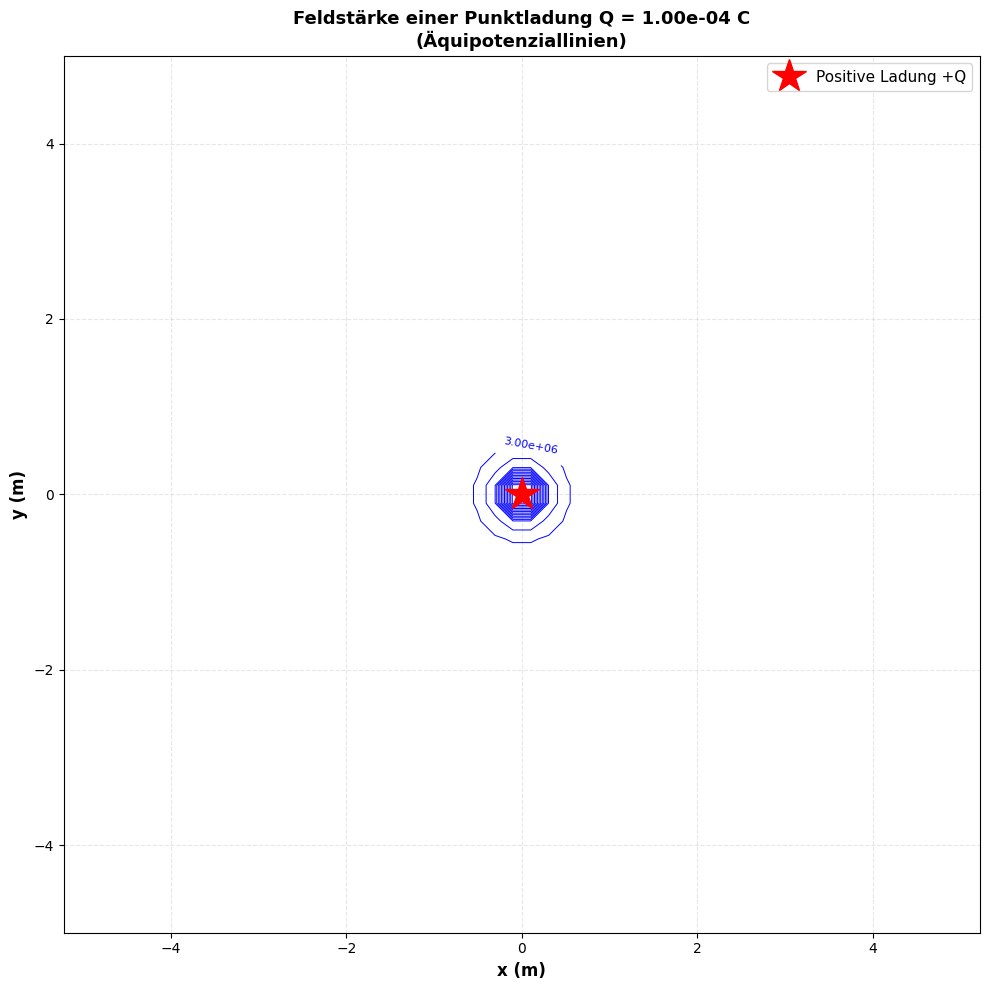


--- Feldstärke bei verschiedenen Abständen ---
Bei r = 0.5 m: E = 3.60e+06 N/C
Bei r = 1.0 m: E = 8.99e+05 N/C
Bei r = 2.0 m: E = 2.25e+05 N/C
Bei r = 3.0 m: E = 9.99e+04 N/C


In [2]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.99e9

# Eingabe der Ladung Q (in Mikrocoulomb)
Q = float(input("Ladung Q (in Mikrocoulomb): ")) * 1e-6

print(f"Ladung: {Q:.2e} C")

# Erstelle ein 2D-Raumgitter
# 50 Punkte pro Achse für gute Auflösung
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Berechne den Abstand von jedem Gitterpunkt zur Ladung (bei Ursprung)
r = np.sqrt(X**2 + Y**2)

# Berechne die Feldstärke E = k*Q/r²
# Achtung: Division durch Null vermeiden!
E = np.zeros_like(r, dtype=float)
mask = r > 0.1  # Nur Punkte mit Abstand > 0,1
E[mask] = np.abs(k * Q / (r[mask]**2))

# Zeichne die Feldstärke mit Kontourlinien
plt.figure(figsize=(10, 10))
contour = plt.contour(X, Y, E, levels=15, colors='blue', linewidths=0.7)

# Füge numerische Labels hinzu
plt.clabel(contour, inline=True, fontsize=8, fmt='%.2e')

# Markiere die Ladung mit einem Stern
if Q > 0:
    plt.plot(0, 0, 'r*', markersize=25, label='Positive Ladung +Q', zorder=5)
    color = 'red'
else:
    plt.plot(0, 0, 'b*', markersize=25, label='Negative Ladung -Q', zorder=5)
    color = 'blue'

plt.xlabel('x (m)', fontsize=12, fontweight='bold')
plt.ylabel('y (m)', fontsize=12, fontweight='bold')
plt.title(f'Feldstärke einer Punktladung Q = {Q:.2e} C\n(Äquipotenziallinien)', 
          fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.axis('equal')
plt.legend(fontsize=11, loc='upper right')
plt.tight_layout()
plt.show()

# Zusatzanalyse: Feldstärke bei verschiedenen Abständen
print("\n--- Feldstärke bei verschiedenen Abständen ---")
for dist in [0.5, 1.0, 2.0, 3.0]:
    E_at_dist = np.abs(k * Q / (dist**2))
    print(f"Bei r = {dist:.1f} m: E = {E_at_dist:.2e} N/C")

### Erklärung der Lösung

**Was sind Äquipotenziallinien?**
- Linien gleicher Feldstärke (nicht Potential, aber ähnlich)
- Sie zeigen, wo die Feldstärke den gleichen Wert hat
- Sie sind **konzentrische Kreise** um eine Punktladung

**Warum Kreise?**
- Eine Punktladung hat **Kugelsymmetrie**
- Der Abstand ist überall gleich – die Feldstärke muss also auch gleich sein
- → Kreisförmige Äquipotenziallinien

**Die Maske `r > 0.1`:**
- Bei r = 0 würde r² = 0, also Division durch Null!
- Mit der Maske setzen wir E = 0 sehr nah bei der Ladung
- Praktisch ist dies kein Problem, da wir ohnehin nicht exakt auf der Ladung messen

### Antworten auf Reflexionsfragen

1. **Warum sind die Kontourlinien Kreise?**
   - Wegen der Kugelsymmetrie einer Punktladung
   - Der Abstand zu jedem Kreis ist konstant → E ist konstant

2. **Was zeigt die Dichte der Linien?**
   - **Die Feldstärke** – je enger die Linien, desto stärker das Feld
   - Nah bei der Ladung sind die Linien dicht (starkes Feld)
   - Weit weg sind die Linien dünn (schwaches Feld)

3. **Wie ändert sich das Bild, wenn Q negativ ist?**
   - Die Form bleibt gleich (immer noch Kreise)
   - Nur die Richtung des Feldes ändert sich (aber das sehen wir bei Kontourlinien nicht)
   - Das Vorzeichen beinflusst nur die Richtung, nicht die Stärke (daher `abs()`)

---

## 🔍 Lösung zu Aufgabe 3: Vektorfeld einer Ladung visualisieren

### Vollständige Lösung

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


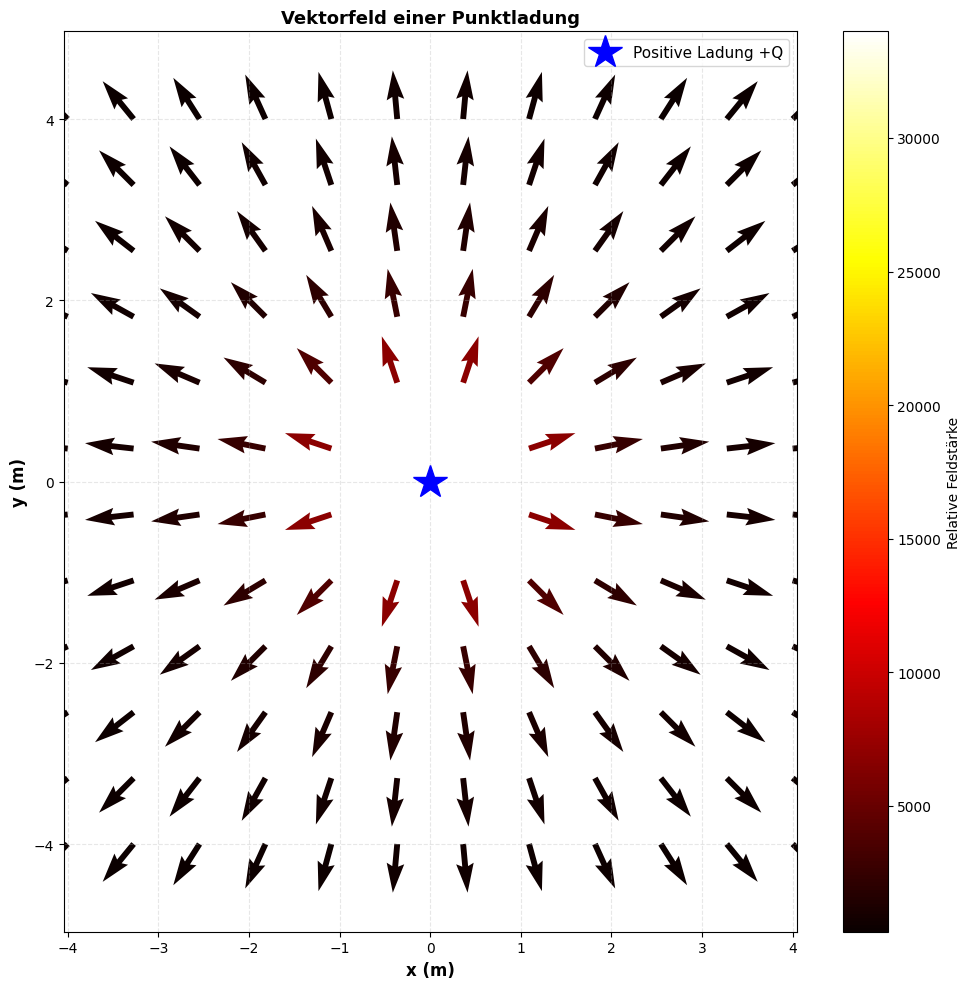

In [3]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.99e9
Q = 1e-6  # Positive Ladung

# Erstelle ein gröberes Gitter (weniger Punkte, damit Pfeile sichtbar bleiben)
x = np.linspace(-4, 4, 12)
y = np.linspace(-4, 4, 12)
X, Y = np.meshgrid(x, y)

# Berechne den Abstand r von jedem Punkt zur Ladung
r = np.sqrt(X**2 + Y**2)

# Berechne die Feldstärke (Magnitude)
E_mag = np.zeros_like(r, dtype=float)
mask = r > 0.1
E_mag[mask] = np.abs(k * Q / (r[mask]**2))

# Berechne die Feldvektor-Komponenten
# Der Vektor zeigt radial nach außen: E_vec = E_mag * (X/r, Y/r)
Ex = np.zeros_like(X, dtype=float)
Ey = np.zeros_like(Y, dtype=float)

for i in range(len(x)):
    for j in range(len(y)):
        if r[j, i] > 0.1:
            # Einheitsvektor in radiale Richtung
            u_r = X[j, i] / r[j, i]
            v_r = Y[j, i] / r[j, i]
            # Feldvektor = Magnitude * Einheitsvektor
            Ex[j, i] = E_mag[j, i] * u_r
            Ey[j, i] = E_mag[j, i] * v_r

# Zeichne mit plt.quiver() (Vektorfeld)
plt.figure(figsize=(10, 10))

# Normalisiere für bessere Sichtbarkeit (alle Pfeile ungefähr gleich lang)
E_norm = np.sqrt(Ex**2 + Ey**2)
Ex_norm = Ex / (E_norm + 1e-10)
Ey_norm = Ey / (E_norm + 1e-10)

# Quiver-Plot mit Farbcodierung nach Feldstärke
quiv = plt.quiver(X, Y, Ex_norm, Ey_norm, E_norm, 
                   cmap='hot', scale=15, width=0.008)

# Colorbar für Feldstärke
cbar = plt.colorbar(quiv, label='Relative Feldstärke')

# Markiere die Ladung
plt.plot(0, 0, 'b*', markersize=25, label='Positive Ladung +Q', zorder=5)

plt.xlabel('x (m)', fontsize=12, fontweight='bold')
plt.ylabel('y (m)', fontsize=12, fontweight='bold')
plt.title('Vektorfeld einer Punktladung', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.axis('equal')
plt.legend(fontsize=11)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.tight_layout()
plt.show()

### Erklärung der Lösung

**Warum Normalisierung (`Ex_norm, Ey_norm`)?**
- Ohne Normalisierung werden Pfeile nah bei der Ladung **riesig** (starkes Feld)
- Mit Normalisierung: Alle Pfeile haben die gleiche Länge, die **Farbe** zeigt die Stärke
- So sehen wir besser die Feldrichtung überall

**Was bedeutet die Farbe?**
- Helle Farben (z.B. Gelb/Weiß) = starkes Feld (nah bei Ladung)
- Dunkle Farben (z.B. Dunkelrot) = schwaches Feld (weit weg)

**Der `scale`-Parameter:**
- `scale=15` steuert die Pfeillänge
- Größer → Pfeile kürzer; Kleiner → Pfeile länger

### Antworten auf Reflexionsfragen

1. **Warum zeigen alle Pfeile nach außen?**
   - Die Ladung Q ist **positiv**
   - Das Feld einer positiven Ladung zeigt immer **nach außen** (radial)
   - Bei einer negativen Ladung würden Pfeile **nach innen** zeigen

2. **Warum werden Pfeile länger, je näher sie an der Ladung sind?**
   - Die Feldstärke nimmt mit 1/r² zu
   - Nah bei der Ladung: r klein → E groß
   - Die Farbe wird hell/gelb (starkes Feld)

3. **Wie sieht das Vektorfeld einer negativen Ladung aus?**
   - Alle Pfeile zeigen **nach innen** (zur Ladung hin)
   - Die Farben sind gleich (Magnitude ist gleich)
   - Nur die Richtung ändert sich

---

## 🔍 Lösung zu Aufgabe 4: Superposition – zwei Ladungen kombinieren

### Vollständige Lösung

Ladung 1: q1 = 1.00e-06 C bei Position [-2.  0.]
Ladung 2: q2 = -1.00e-06 C bei Position [2. 0.]
→ Dies ergibt ein elektrisches Dipolfeld


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


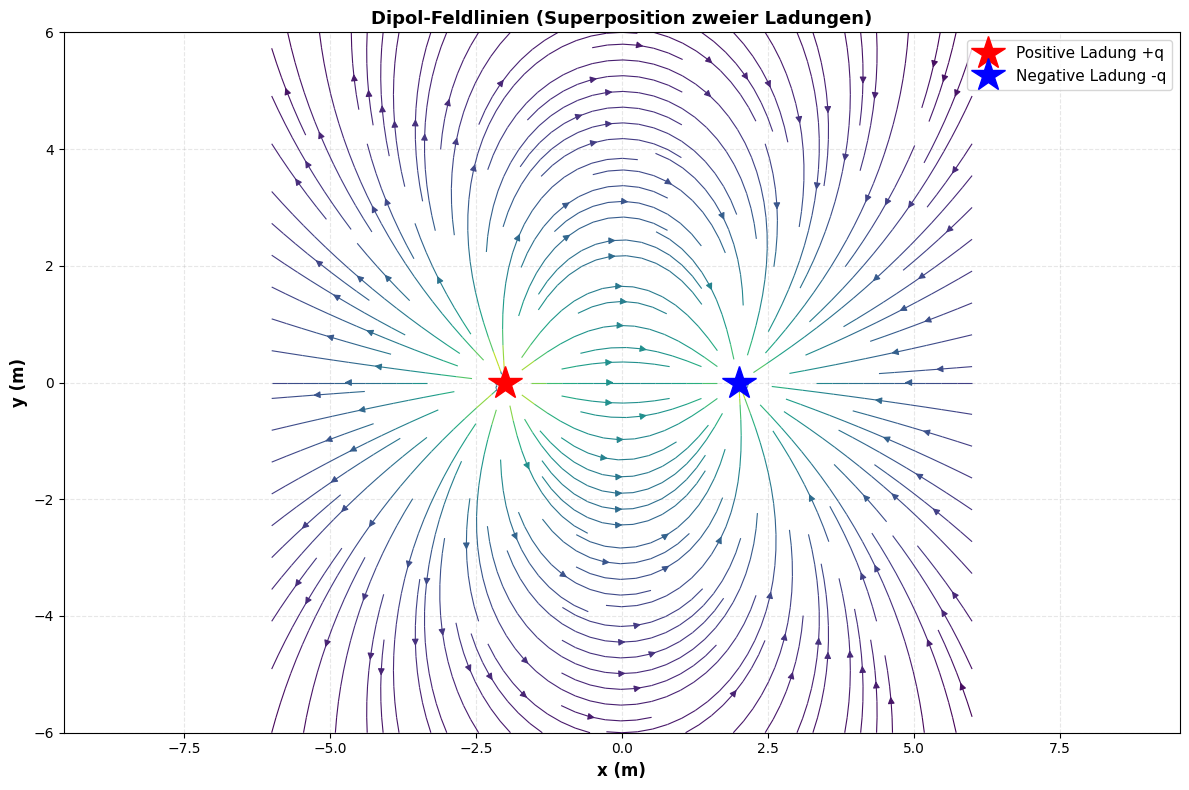


--- Analyse: Wo ist das Gesamtfeld null? ---
Feldstärke ist minimal bei x ≈ -0.02 m
Dies ist zwischen den beiden Ladungen, wo sich ihre Felder aufheben


In [4]:
import numpy as np
import matplotlib.pyplot as plt

k = 8.99e9

# Definiere zwei Ladungen an verschiedenen Positionen
q1 = 1e-6    # Positive Ladung
q2 = -1e-6   # Negative Ladung (gleich groß!)
pos1 = np.array([-2.0, 0.0])  # Position von q1
pos2 = np.array([2.0, 0.0])   # Position von q2

print(f"Ladung 1: q1 = {q1:.2e} C bei Position {pos1}")
print(f"Ladung 2: q2 = {q2:.2e} C bei Position {pos2}")
print("→ Dies ergibt ein elektrisches Dipolfeld")

# Erstelle ein feines Gitter
x = np.linspace(-6, 6, 150)
y = np.linspace(-6, 6, 150)
X, Y = np.meshgrid(x, y)

# Berechne den Abstand zu beiden Ladungen
dx1 = X - pos1[0]
dy1 = Y - pos1[1]
r1 = np.sqrt(dx1**2 + dy1**2)

dx2 = X - pos2[0]
dy2 = Y - pos2[1]
r2 = np.sqrt(dx2**2 + dy2**2)

# Initialisiere die Feldkomponenten
Ex = np.zeros_like(X, dtype=float)
Ey = np.zeros_like(Y, dtype=float)

# Feld von Ladung 1 (mit Maske gegen Division durch Null)
mask1 = r1 > 0.2
E1_mag = np.zeros_like(r1)
E1_mag[mask1] = k * q1 / (r1[mask1]**2)

# Feldvektor = Magnitude * Einheitsvektor
Ex += E1_mag * (dx1 / np.where(r1 > 0.2, r1, 1))
Ey += E1_mag * (dy1 / np.where(r1 > 0.2, r1, 1))

# Feld von Ladung 2
mask2 = r2 > 0.2
E2_mag = np.zeros_like(r2)
E2_mag[mask2] = k * q2 / (r2[mask2]**2)

# Feldvektor von Ladung 2 hinzufügen (Superposition!)
Ex += E2_mag * (dx2 / np.where(r2 > 0.2, r2, 1))
Ey += E2_mag * (dy2 / np.where(r2 > 0.2, r2, 1))

# Berechne die Gesamtfeldstärke
E_total = np.sqrt(Ex**2 + Ey**2)

# Zeichne mit Streamlines
plt.figure(figsize=(12, 8))

# Streamplot zeichnet automatisch Feldlinien
strm = plt.streamplot(X, Y, Ex, Ey, 
                      color=np.log(E_total + 1),  # Farbe nach log(E)
                      cmap='viridis', density=1.5, linewidth=0.8)

# Markiere beide Ladungen
plt.plot(pos1[0], pos1[1], 'r*', markersize=25, label='Positive Ladung +q', zorder=5)
plt.plot(pos2[0], pos2[1], 'b*', markersize=25, label='Negative Ladung -q', zorder=5)

plt.xlabel('x (m)', fontsize=12, fontweight='bold')
plt.ylabel('y (m)', fontsize=12, fontweight='bold')
plt.title('Dipol-Feldlinien (Superposition zweier Ladungen)', 
          fontsize=13, fontweight='bold')
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, alpha=0.3, linestyle='--')
plt.axis('equal')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.tight_layout()
plt.show()

# Zusatzanalyse: Suche den Punkt mit E = 0
print("\n--- Analyse: Wo ist das Gesamtfeld null? ---")
# Dies sollte zwischen den Ladungen sein, bei x=0 (wegen Symmetrie)
# Genaue Berechnung:
x_neutral = np.linspace(-2, 2, 100)
y_neutral = 0

E_profile = []
for x_val in x_neutral:
    dx1_val = x_val - pos1[0]
    dy1_val = y_neutral - pos1[1]
    r1_val = np.sqrt(dx1_val**2 + dy1_val**2)
    
    dx2_val = x_val - pos2[0]
    dy2_val = y_neutral - pos2[1]
    r2_val = np.sqrt(dx2_val**2 + dy2_val**2)
    
    if r1_val > 0.2 and r2_val > 0.2:
        E1_val = k * q1 / r1_val**2
        E2_val = k * q2 / r2_val**2
        E_total_val = E1_val + E2_val
        E_profile.append(E_total_val)
    else:
        E_profile.append(np.nan)

E_profile = np.array(E_profile)
idx_min = np.nanargmin(np.abs(E_profile))
print(f"Feldstärke ist minimal bei x ≈ {x_neutral[idx_min]:.2f} m")
print(f"Dies ist zwischen den beiden Ladungen, wo sich ihre Felder aufheben")

### Erklärung der Lösung

**Das Prinzip der Superposition:**
- Elektrische Felder **überlagern sich** additiv
- Gesamtfeld = Feld von q₁ + Feld von q₂
- Dies ist ein fundamentales Prinzip der Physik!

**Warum Streamlines?**
- `plt.streamplot()` zeichnet automatisch Feldlinien
- Diese folgen der Richtung des Feldvektors an jedem Punkt
- Viel eleganter als einzelne Pfeile für große Gebiete

**Das Dipolfeld:**
- Feldlinien gehen von + zu – Ladung
- Dies nennt sich ein **elektrisches Dipolfeld**
- Wichtig für: Moleküle, Atome, Magnete!

### Antworten auf Reflexionsfragen

1. **Warum gehen die Feldlinien von + zu – Ladung?**
   - Per Definition: Feldlinien zeigen die Richtung der Kraft auf eine positive Testladung
   - Eine positive Testladung wird **von + abgestoßen und zu – gezogen**
   - → Feldlinien gehen von + nach –

2. **Gibt es einen Punkt, an dem das Gesamtfeld null ist?**
   - **Ja**, zwischen den beiden Ladungen (bei x ≈ 0, da symmetrisch)
   - Die Felder heben sich dort auf: E₁ + E₂ = 0
   - Dies ist ein **neutraler Punkt** oder **Sattelpunkt**

3. **Wie sieht das Feld aus, wenn beide Ladungen positiv sind?**
   - Feldlinien gehen **nach außen** von beiden Ladungen
   - Sie **stoßen sich ab** und verformen sich gegenseitig
   - Im Mittelpunkt wäre die Feldstärke minimal (aber nicht null!)

---

## 💡 Erweiterte Konzepte & Zusatzaufgaben

### Zusatzaufgabe 1: Feldenergie visualisieren

Die **Energie eines Feldes** ist proportional zum Quadrat der Feldstärke:

$$
u = \frac{1}{2} \epsilon_0 E^2
$$

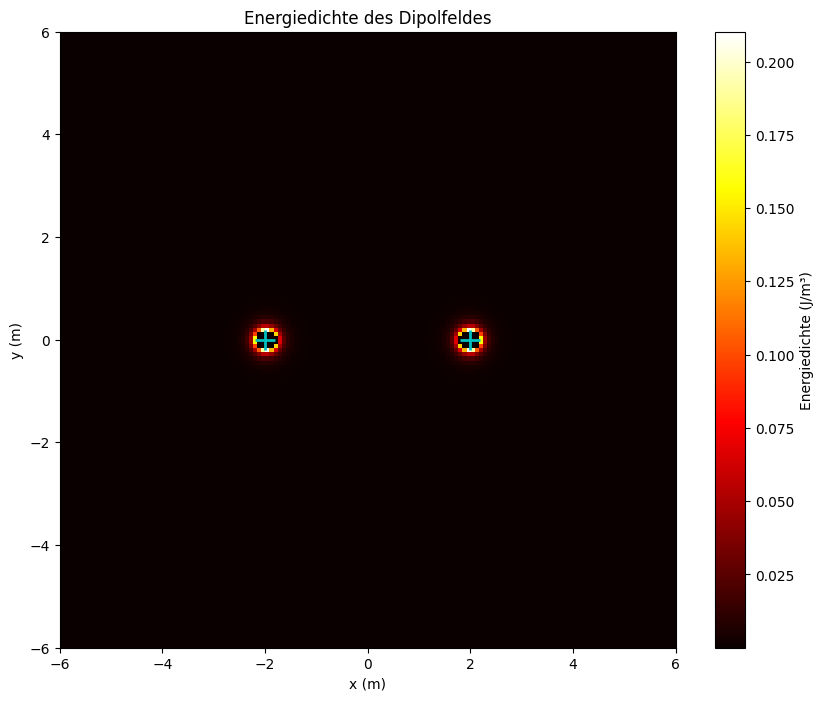

In [5]:
# Visualisiere die Energiedichte als Heatmap
plt.figure(figsize=(10, 8))
u = 0.5 * 8.85e-12 * E_total**2  # Energiedichte

plt.imshow(u, extent=[-6, 6, -6, 6], cmap='hot', origin='lower')
plt.colorbar(label='Energiedichte (J/m³)')
plt.plot(pos1[0], pos1[1], 'c+', markersize=15, markeredgewidth=2)
plt.plot(pos2[0], pos2[1], 'c+', markersize=15, markeredgewidth=2)
plt.title('Energiedichte des Dipolfeldes')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

### Zusatzaufgabe 2: Potenzial visualisieren

Das **elektrische Potenzial** V hängt mit der Feldstärke zusammen:

$$
V = k \cdot \frac{Q}{r}
$$

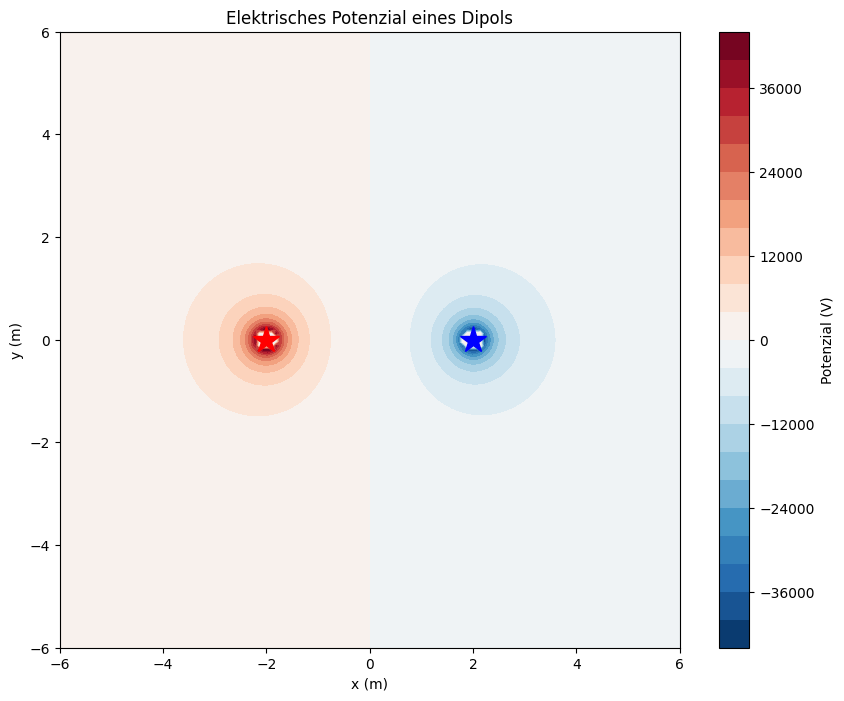

In [6]:
# Berechne das Potenzial (Linearkombination beider Ladungen)
V = np.zeros_like(X, dtype=float)
V += k * q1 / np.where(r1 > 0.2, r1, np.inf)
V += k * q2 / np.where(r2 > 0.2, r2, np.inf)

plt.figure(figsize=(10, 8))
contour_V = plt.contourf(X, Y, V, levels=20, cmap='RdBu_r')
plt.colorbar(contour_V, label='Potenzial (V)')
plt.plot(pos1[0], pos1[1], 'r*', markersize=20)
plt.plot(pos2[0], pos2[1], 'b*', markersize=20)
plt.title('Elektrisches Potenzial eines Dipols')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

---

## 📚 Zusammenfassung: Wichtige Erkenntnisse

| Konzept | Formel | Bedeutung |
|---------|--------|-----------|
| **Coulomb-Kraft** | $$F = k \frac{\|q_1 q_2\|}{r^2}$$ | Kraft zwischen zwei Ladungen |
| **Feldstärke** | $$E = \frac{F}{q} = k\frac{Q}{r^2}$$ | Kraft pro Ladungseinheit |
| **Feldlinien** | Pfeile von + zu – | Zeigen Feldrichtung und -stärke |
| **Superposition** | $$\vec{E}_{ges} = \vec{E}_1 + \vec{E}_2$$ | Felder addieren sich vektoriell |
| **Energiedichte** | $$u = \frac{1}{2}\epsilon_0 E^2$$ | Energie pro Volumeneinheit |

---

## 🧠 Häufig gestellte Fragen

**F: Warum ist die Feldstärke bei der Ladung unendlich?**
A: Mathematisch: r→0 ⟹ E→∞. Physikalisch: Punktladungen sind idealisiert. Reale Ladungen haben endliche Ausdehnung.

**F: Können sich Feldlinien kreuzen?**
A: Nein! An jedem Punkt gibt es nur **eine** Feldrichtung. Wenn Linien sich kreuzen würden, hätte das Feld zwei Richtungen – Widerspruch!

**F: Warum verwenden wir `plt.quiver()` statt `plt.streamplot()`?**
A: `quiver()` = Einzelne Pfeile (zeigt Feld an diskreten Punkten). `streamplot()` = Kontinuierliche Linien (zeigt Feldverlauf). Je nach Anwendung!

---

**Gratulation!** Du hast alle Aufgaben zu Modul 6 gelöst. Bereit für **Modul 7 – Magnetismus und Induktion**?